In [11]:
import pandas as pd

# Leer el archivo Stata
df = pd.read_stata('Individual_t104.dta')

In [15]:
# Guardar como archivo Excel
df.to_excel('Individual_t104.xlsx', index=False)

In [17]:
df_excel = pd.read_excel('Individual_t104.xlsx')

# Ver las primeras 5 filas del Excel
print(df_excel.head())

   CODUSU  nro_hogar componente h15  ano4       trimestre             region  \
0  125098          1          1  Sí  2004  1er. Trimestre  Gran Buenos Aires   
1  125397          1          1  Sí  2004  1er. Trimestre  Gran Buenos Aires   
2  125515          1          1  Sí  2004  1er. Trimestre  Gran Buenos Aires   
3  125558          1          1  Sí  2004  1er. Trimestre  Gran Buenos Aires   
4  125558          1          2  Sí  2004  1er. Trimestre  Gran Buenos Aires   

  mas_500              aglomerado  pondera  ... deccfr ideccfr rdeccfr  \
0       S  Ciudad de Buenos Aires     1299  ...      7               6   
1       S  Ciudad de Buenos Aires     2018  ...      0               0   
2       S  Ciudad de Buenos Aires     1486  ...      7               7   
3       S  Ciudad de Buenos Aires     1674  ...      8               8   
4       S  Ciudad de Buenos Aires     1674  ...      8               8   

  gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0      06            

In [19]:
import pandas as pd

#subimos las bases de datos
df_2004 = pd.read_excel('Individual_t104.xlsx')
df_2024 = pd.read_excel("usu_individual_T124.xlsx")

In [21]:
df_2004["region"].unique()

array(['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana',
       'Patagónica'], dtype=object)

In [23]:
df_2004_gba = df_2004[df_2004["region"] == "Gran Buenos Aires"]
df_2024_gba = df_2024[df_2024["REGION"] == "Gran Buenos Aires"]

In [25]:
df_a = pd.read_excel('Individual_t104.xlsx')
print(df_a.shape)

df_b = pd.read_excel("usu_individual_T124.xlsx")
print(df_b.shape)

# Filtramos solo la región "Gran Buenos Aires"
df_a_gba = df_a[df_a["region"] == "Gran Buenos Aires"]
df_b_gba = df_b[df_b["REGION"] == "Gran Buenos Aires"]

df = pd.concat([df_a_gba, df_b_gba])
print(df.shape)

(45289, 176)
(46050, 177)
(7647, 352)


In [26]:
df_2004 = df_a.copy()
df_2024 = df_b.copy()

In [27]:
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [28]:
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()



respondieron_2004 = df_2004[df_2004['ESTADO'] != 0]
norespondieron_2004 = df_2004[df_2004['ESTADO'] == 0]


print(f"Año 2004:")
print(f"Cantidad de personas que NO respondieron condición de actividad: {norespondieron_2004.shape[0]}")
print(f"Cantidad de personas que respondieron: {respondieron_2004.shape[0]}")

Año 2004:
Cantidad de personas que NO respondieron condición de actividad: 0
Cantidad de personas que respondieron: 45289


In [33]:
df_ocupados = df_2004[df_2004['ESTADO'] == 'Ocupado']
print(df_ocupados.shape)
print(df_2004['ESTADO'].value_counts())

(17022, 176)
ESTADO
Inactivo                                                        17700
Ocupado                                                         17022
Menor de 10 años                                                 7815
Desocupado                                                       2717
Entrevista individual no realizada (no respuesta al cuestion       35
Name: count, dtype: int64


In [35]:
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()



respondieron_2024 = df_2024[df_2024['ESTADO'] != 0]
norespondieron_2024 = df_2024[df_2024['ESTADO'] == 0]


print(f"Año 2024:")
print(f"Cantidad de personas que NO respondieron condición de actividad: {norespondieron_2024.shape[0]}")
print(f"Cantidad de personas que respondieron: {respondieron_2024.shape[0]}")

Año 2024:
Cantidad de personas que NO respondieron condición de actividad: 81
Cantidad de personas que respondieron: 45969


In [37]:
respondieron_2024 = respondieron_2024.copy()
respondieron_2024['desocupado'] = (respondieron_2024['ESTADO'] == 2).astype(int)

respondieron_2004 = respondieron_2004.copy()
respondieron_2004['desocupado'] = (respondieron_2004['ESTADO'] == 2).astype(int)

In [39]:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [40]:
datos_2024 = respondieron_2024[respondieron_2024['ANO4'] == 2024].copy()

# y: variable dependiente
y = datos_2024['desocupado']

# X: variables independientes (numéricas menos ESTADO y desocupado)
X = datos_2024.select_dtypes(include='number').drop(columns=['ESTADO', 'desocupado', 'ANO4'], errors='ignore') # Also drop the 'ANO4' column from features

# Agregar columna de unos
X.insert(0, 'constante', 1)

In [43]:
from sklearn.model_selection import train_test_split

# Año 2024
datos_2024 = respondieron_2024[respondieron_2024['ANO4'] == 2024].copy()
y_2024 = datos_2024['desocupado']
X_2024 = datos_2024.select_dtypes(include='number').drop(columns=['ESTADO', 'desocupado', 'ANO4'], errors='ignore')
X_2024.insert(0, 'constante', 1)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=444)

# Año 2004
datos_2004 = respondieron_2004[respondieron_2004['ANO4'] == 2004].copy()
y_2004 = datos_2004['desocupado']
X_2004 = datos_2004.select_dtypes(include='number').drop(columns=['ESTADO', 'desocupado', 'ANO4'], errors='ignore')
X_2004.insert(0, 'constante', 1)
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=444)

In [53]:
# A. Enfoque de validación Punto 1
from scipy import stats
import pandas as pd


var = X_train_2024.columns[0]

x_train = X_train_2024[var]
x_test = X_test_2024[var]
y_train = y_train_2024
y_test = y_test_2024

# Calculo los estadísticos
estadisticos = pd.DataFrame({
    'N train': [x_train.shape[0], y_train.shape[0]],
    'Mean train': [x_train.mean(), y_train.mean()],
    'sd train': [x_train.std(), y_train.std()],
    'N test': [x_test.shape[0], y_test.shape[0]],
    'Mean test': [x_test.mean(), y_test.mean()],
    'sd test': [x_test.std(), y_test.std()],
})

# Calculo el t-test y p-value
t_test_x = stats.ttest_ind(x_train, x_test, equal_var=False)
t_test_y = stats.ttest_ind(y_train, y_test, equal_var=False)

estadisticos['t-test'] = [t_test_x.statistic, t_test_y.statistic]
estadisticos['p-value'] = [t_test_x.pvalue, t_test_y.pvalue]


estadisticos.index = [var, 'desocupado']

# Exporta a Excel
estadisticos.to_excel('estadisticos_2024_simple.xlsx')

# Mostramos la tabla
print(estadisticos)

            N train  Mean train  sd train  N test  Mean test   sd test  \
constante     32178    1.000000  0.000000   13791   1.000000  0.000000   
desocupado    32178    0.029523  0.169271   13791   0.029875  0.170247   

              t-test   p-value  
constante        NaN       NaN  
desocupado -0.203078  0.839075  


C:\Users\51964\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [47]:
from scipy import stats
import pandas as pd

# Seleccionamos UNA variable independiente de X
var = X_train_2004.columns[0]

x_train = X_train_2004[var]
x_test = X_test_2004[var]
y_train = y_train_2004
y_test = y_test_2004

# Calculo los estadísticos
estadisticos = pd.DataFrame({
    'N train': [x_train.shape[0], y_train.shape[0]],
    'Mean train': [x_train.mean(), y_train.mean()],
    'sd train': [x_train.std(), y_train.std()],
    'N test': [x_test.shape[0], y_test.shape[0]],
    'Mean test': [x_test.mean(), y_test.mean()],
    'sd test': [x_test.std(), y_test.std()],
})

# Calculo el t-test y p-value
t_test_x = stats.ttest_ind(x_train, x_test, equal_var=False)
t_test_y = stats.ttest_ind(y_train, y_test, equal_var=False)

estadisticos['t-test'] = [t_test_x.statistic, t_test_y.statistic]
estadisticos['p-value'] = [t_test_x.pvalue, t_test_y.pvalue]

# Define las variables como índice
estadisticos.index = [var, 'desocupado']

# Exporta a Excel
estadisticos.to_excel('estadisticos_2004_simple.xlsx')

# Mostramos la tabla
print(estadisticos)

            N train  Mean train  sd train  N test  Mean test  sd test  t-test  \
constante     31702         1.0       0.0   13587        1.0      0.0     NaN   
desocupado    31702         0.0       0.0   13587        0.0      0.0     NaN   

            p-value  
constante       NaN  
desocupado      NaN  


C:\Users\51964\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [51]:
# B. Método Supervisado 1: Modelo de Regresión Lineal punto 2
import pandas as pd
import numpy as np

#lo primero que hicimos fue unir las bases de train en una sola para poder trabajar facilmente con los datos.
def armar_train_completo(X_train, y_train, datos_originales):
    df_train = datos_originales.loc[X_train.index].copy()
    df_train['desocupado'] = y_train
    for col in X_train.columns:
        if col != 'constante':
            df_train[col] = X_train[col]
    return df_train


train_2004 = armar_train_completo(X_train_2004, y_train_2004, datos_2004)
train_2024 = armar_train_completo(X_train_2024, y_train_2024, datos_2024)


train_union = pd.concat([train_2004, train_2024], axis=0).reset_index(drop=True)

#definimos las variblaes que vamos a usar
train_union['CH06'] = pd.to_numeric(train_union['CH06'], errors='coerce')

train_union['edad'] = train_union['CH06']
train_union['edad2'] = train_union['CH06'] ** 2

train_union['mujer'] = (train_union['CH04'] == 2).astype(int)


train_union['educ'] = pd.to_numeric(train_union['CH14'], errors='coerce')


train_union['CH09'] = train_union['CH09']
train_union['PP02I'] = train_union['PP02I']


train_union['P21_ajustado'] = train_union['P21']
train_union.loc[train_union['ANO4'] == 2004, 'P21_ajustado'] *= 1032

train_union['salario_semanal'] = pd.to_numeric(train_union['P21_ajustado'], errors='coerce')

In [55]:
train_union.head(2)

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,IMPUTA,PONDIIO,PONDII,PONDIH,edad,edad2,mujer,educ,P21_ajustado,salario_semanal
0,177754,1,3,Sí,2004,1er. Trimestre,NEA,N,Corrientes,241,...,NaN,NaN,NaN,NaN,12.0,144.0,0,7.0,0,0
1,264328,1,4,Sí,2004,1er. Trimestre,NEA,N,Gran Resistencia,115,...,NaN,NaN,NaN,NaN,24.0,576.0,0,5.0,0,0


In [57]:
#definimos la region a trabajar
train_gba = train_union[train_union['REGION'] == 'Gran Buenos Aires'].copy()

In [59]:
train_gba = train_union[(train_union['REGION'] == 'Gran Buenos Aires') | (train_union['REGION'] == 1)].copy()

In [61]:
# Convertimos CH09 y PP02I a numéricos
cols = ['salario_semanal', 'edad', 'edad2', 'educ', 'mujer', 'CH09', 'PP02I']

train_union['CH09'] = pd.to_numeric(train_union['CH09'], errors='coerce')
train_union['PP02I'] = pd.to_numeric(train_union['PP02I'], errors='coerce')
train_union = train_union.dropna(subset=cols)

print(train_union[cols].dtypes)
print(train_union[cols].isnull().sum())
print(train_union.shape)

salario_semanal      int64
edad               float64
edad2              float64
educ               float64
mujer                int32
CH09               float64
PP02I              float64
dtype: object
salario_semanal    0
edad               0
edad2              0
educ               0
mujer              0
CH09               0
PP02I              0
dtype: int64
(15914, 188)


In [63]:
print(train_union.shape)

(15914, 188)


In [65]:
import statsmodels.api as sm

# predictores
X_base = ['edad']
X_edad_educ = ['edad', 'edad2', 'educ']
X_edad_educ_mujer = ['edad', 'edad2', 'educ', 'mujer']
X_todas = ['edad', 'edad2', 'educ', 'mujer', 'CH09', 'PP02I']

def correr_modelo(X_vars, y_var='salario_semanal'):
  X = train_union[X_vars]
  X = sm.add_constant(X)
  y = train_union[y_var]

  model = sm.OLS(y, X).fit()

  print(f"\nModelo con variables: {X_vars}")
  for var in model.params.index:
    coef = model.params[var]
    std_err = model.bse[var]
    print(f"{var}: {coef:.3f} ({std_err:.2f})")
  print(f"R2 ajustado: {model.rsquared_adj:.3f}")

  return model

# Modelos:
model_1 = correr_modelo(['edad'])
model_2 = correr_modelo(['edad', 'edad2'])
model_3 = correr_modelo(['edad', 'edad2', 'educ'])
model_4 = correr_modelo(['edad', 'edad2', 'educ', 'mujer'])
model_5 = correr_modelo(['edad', 'edad2', 'educ', 'mujer', 'CH09', 'PP02I'])


Modelo con variables: ['edad']
const: 7842.470 (2587.15)
edad: 2180.320 (75.49)
R2 ajustado: 0.050

Modelo con variables: ['edad', 'edad2']
const: -110333.360 (3967.80)
edad: 11997.859 (267.48)
edad2: -129.499 (3.40)
R2 ajustado: 0.129

Modelo con variables: ['edad', 'edad2', 'educ']
const: -109237.964 (3965.85)
edad: 12102.218 (267.58)
edad2: -130.177 (3.39)
educ: -640.494 (96.39)
R2 ajustado: 0.132

Modelo con variables: ['edad', 'edad2', 'educ', 'mujer']
const: -84158.939 (4189.28)
edad: 12096.915 (265.12)
edad2: -129.651 (3.36)
educ: -691.245 (95.55)
mujer: -50433.716 (2921.38)
R2 ajustado: 0.147

Modelo con variables: ['edad', 'edad2', 'educ', 'mujer', 'CH09', 'PP02I']
const: -582.579 (9602.65)
edad: 10369.479 (280.03)
edad2: -107.082 (3.48)
educ: -448.534 (91.97)
mujer: -36139.598 (2803.77)
CH09: -12977.419 (6184.40)
PP02I: -58711.361 (1485.02)
R2 ajustado: 0.227


In [105]:
import pandas as pd

# Cargar los datos
df = pd.read_excel("Individual_t104.xlsx")

# Crear variable 'ocupado': estado == 1 (ocupado)
df["ocupado"] = (df["estado"] == 1).astype(int)

# Filtrar solo ocupados
df = df[df["ocupado"] == 1]

# Crear variable 'edad' desde ch06 (esto es lo que te estaba faltando o falló)
df["edad"] = df["ch06"]

# Crear edad^2
df["edad2"] = df["edad"] ** 2

# Nivel educativo
df["educ"] = df["nivel_ed"]

# Crear dummy mujer
df["mujer"] = (df["ch04"] == 2).astype(int)

# Crear salario semanal
df["salario_semanal"] = df["p21"]

# Eliminar filas con NaNs
df = df.dropna(subset=["salario_semanal", "edad", "edad2", "educ", "mujer"])

In [111]:
df = pd.read_excel("usu_individual_T124.xlsx")
print(df.columns.tolist())

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

In [113]:
import pandas as pd

# Cargar el archivo
df = pd.read_excel("usu_individual_T124.xlsx")

# Crear variable de ocupado
df["ocupado"] = df["CAT_OCUP"].isin([1, 2, 3]).astype(int)

# Filtrar solo personas ocupadas
df = df[df["ocupado"] == 1]

# Crear variables necesarias
df["edad"] = df["CH06"]
df["edad2"] = df["edad"] ** 2
df["educ"] = df["NIVEL_ED"]
df["mujer"] = (df["CH04"] == 2).astype(int)

# Crear salario semanal (P21 es ingreso total individual, en general)
df["salario_semanal"] = df["P21"]

# Eliminar filas con valores faltantes
df = df.dropna(subset=["salario_semanal", "edad", "edad2", "educ", "mujer"])

# Mostrar primeras filas
print(df[["salario_semanal", "edad", "edad2", "educ", "mujer"]].head())

   salario_semanal  edad  edad2  educ  mujer
0               -9    44   1936     3      1
3           250000    54   2916     4      0
4           200000    53   2809     4      1
5           200000    26    676     6      1
6           200000    25    625     5      0


In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# --- Cargar datos y armar variables (ya hecho antes) ---
df = pd.read_excel("usu_individual_T124.xlsx")

# Filtrar ocupados
df["ocupado"] = (df["ESTADO"] == 1).astype(int)
df = df[df["ocupado"] == 1]

# Crear variables
df["salario_semanal"] = df["P47T"] / df["INTENSI"]
df["educ"] = df["NIVEL_ED"]
df["mujer"] = (df["CH04"] == 2).astype(int)
df["edad"] = df["CH06"]
df["edad2"] = df["edad"] ** 2

# Eliminar observaciones con NaNs
df = df.dropna(subset=["salario_semanal", "edad", "edad2", "educ", "mujer"])

# Variables predictoras y target
X = df[["edad", "edad2", "educ", "mujer"]]
y = df["salario_semanal"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Ejercicio 3 - entrenamiento lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

In [129]:
# Entrenamiento cv
scores_cv = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10)
mse_cv = -np.mean(scores_cv)

In [185]:
# Entrenamiento ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [133]:
# Entrenamiento lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [189]:
# Entrenamiento CART
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

In [187]:
# Comparamos los entrenamientos
print("MSE - Lineal:", mse_lr)
print("MSE - Cross-Validation:", mse_cv)
print("MSE - Ridge:", mse_ridge)
print("MSE - Lasso:", mse_lasso)
print("MSE - Árbol (CART):", mse_tree)

MSE - Lineal: 22461598887.425438
MSE - Cross-Validation: 38798275881.884705
MSE - Ridge: 22461592940.697018
MSE - Lasso: 22461598375.43713
MSE - Árbol (CART): 24048287993.63173


In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.api as sm

# Agregamos unas constantes
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Entrenamos el modelo de regresión lineal con statsmodels
modelo_lineal = sm.OLS(y_train, X_train_sm).fit()

def eval_model(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return [nombre, round(mse, 2), round(rmse, 2), round(mae, 2)]

resultados = []
resultados.append(eval_model("Lineal (OLS)", modelo_lineal, X_test_sm, y_test))
resultados.append(eval_model("Lineal CV", lr, X_test, y_test))
resultados.append(eval_model("Ridge", ridge, X_test, y_test))
resultados.append(eval_model("Lasso", lasso, X_test, y_test))
resultados.append(eval_model("Árbol (CART)", tree, X_test, y_test))

# Creamos una tabla de ayuda para ver los valores
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "MSE", "RMSE", "MAE"])
print(df_resultados)

         Modelo           MSE       RMSE       MAE
0  Lineal (OLS)  2.246160e+10  149871.94  96806.92
1     Lineal CV  2.246160e+10  149871.94  96806.92
2         Ridge  2.246159e+10  149871.92  96806.75
3         Lasso  2.246160e+10  149871.94  96806.91
4  Árbol (CART)  2.404829e+10  155075.10  97098.90


In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calcular_metricas(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    return round(mse, 2), round(rmse, 2), round(mae, 2)

In [201]:
# Acomodamos para definir la variable 5 y que no sea del 0 al 4
X5_train = sm.add_constant(X_train[["edad", "edad2", "educ", "mujer"]])
modelo5 = sm.OLS(y_train, X5_train).fit()

X5_test = sm.add_constant(X_test[["edad", "edad2", "educ", "mujer"]])

In [191]:
# Definimos variables 
m1 = calcular_metricas(modelo1, X1_test, y_test)
m2 = calcular_metricas(modelo2, X2_test, y_test)
m3 = calcular_metricas(modelo3, X3_test, y_test)
m4 = calcular_metricas(modelo4, X4_test, y_test)
m5 = calcular_metricas(modelo5, X5_test, y_test)

In [195]:
# Ejercicio 3 - Creación de la tabla

import pandas as pd

# Crear DataFrame con los valores
tabla_3 = pd.DataFrame({
    "(1)": m1,
    "(2)": m2,
    "(3)": m3,
    "(4)": m4,
    "(5)": m5
}, index=["MSE test", "RMSE test", "MAE test"])

# Mostrar la tabla con los parámetros establecidos
print("Tabla 2 - Enfoque de validación")
display(tabla_3)

Tabla 2 - Enfoque de validación


,(1),(2),(3),(4),(5)
MSE test,2.346156e+10,2.337374e+10,2.269723e+10,2.246160e+10,2.246160e+10
RMSE test,1.531717e+05,1.528847e+05,1.506560e+05,1.498719e+05,1.498719e+05
MAE test,9.941748e+04,9.886085e+04,9.735170e+04,9.680692e+04,9.680692e+04


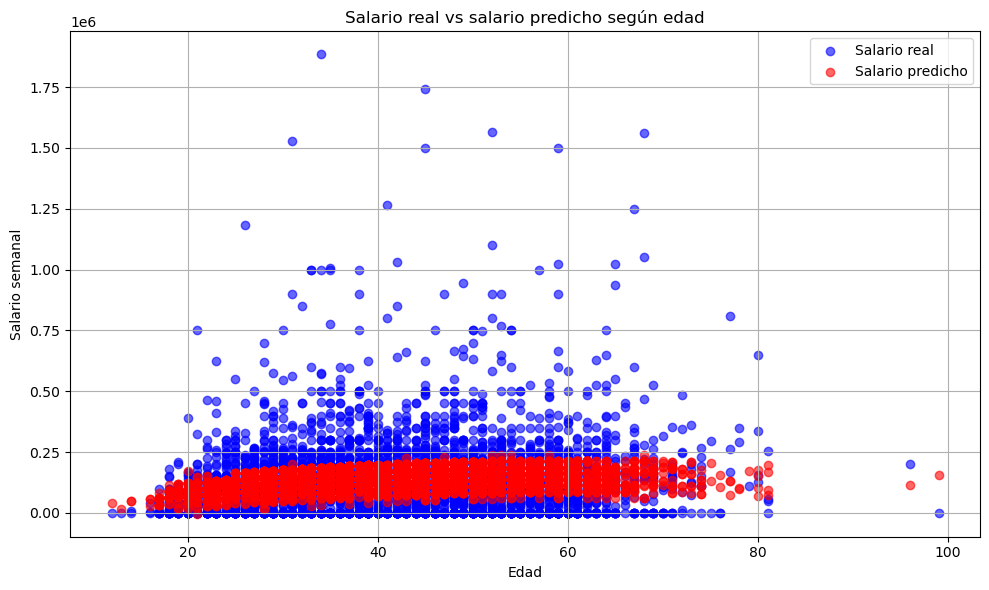

In [181]:
# Ejercicio 4 - Gráfico de dispersión

import matplotlib.pyplot as plt

y_pred = modelo4.predict(X4_test) 
edad_test = X4_test["edad"]

plt.figure(figsize=(10, 6))

# Salario real
plt.scatter(edad_test, y_test, label="Salario real", alpha=0.6, color='blue')

# Salario predicho
plt.scatter(edad_test, y_pred, label="Salario predicho", alpha=0.6, color='red')

plt.xlabel("Edad")
plt.ylabel("Salario semanal")
plt.title("Salario real vs salario predicho según edad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()